<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/HW5/DEelectoral_HW5_Kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the delaware opendata to extract the voting precincts geometries

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.8MB 240kB/s 
     |████████████████████████████████| 10.9MB 39.3MB/s 


In [2]:
import geopandas as gpd
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns

# read in data

## read in electoral precinct geojson file in geopandas (directly from the URL)

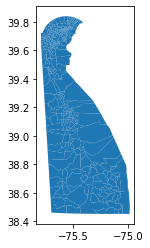

In [3]:
de_elecp = gpd.read_file("https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson")
de_elecp.plot()

In [4]:
de_elecp.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."


## read in turnout data - keep only election district, and votes


In [5]:
turnout = pd.read_csv("https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv")
turnout = turnout[["election_district", "votes"]]
turnout

,election_district,votes
0,01-01,581
1,01-01,51
2,01-01,5
3,01-01,6
4,02-01,937
...,...,...
4719,07-41,545
4720,08-41,191
4721,08-41,335
4722,Total,3388


## group turnout data by election district and get the total number of data for that district

there are multiple entries for each geometry because there entries indicate the votes per candidate.


In [6]:
turnout = turnout.groupby("election_district").sum()
turnout

,votes
election_district,
01-01,2519
01-02,3632
01-03,2347
01-04,4676
01-05,3973
...,...
16-04,344
16-31,29
16-41,66


## merge the turnout data with the electoral map


In [7]:
de_elecmap = de_elecp.merge(turnout, left_on="EDRD_2012", right_on="election_district")
de_elecmap

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722
...,...,...,...,...,...,...,...,...
424,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451...",4719
425,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651...",2202
426,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585...",2086
427,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804...",1197


In [8]:
# Calculate population density
de_elecmap["popdensity"] = de_elecmap["POPULATION"] / (de_elecmap["geometry"].area/10**6) 
de_elecmap["log_popden"] = np.log10(de_elecmap.popdensity)
de_elecmap.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes,popdensity,log_popden
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598,1.121451e+13,13.049780
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390,4.973350e+12,12.696649
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690,2.584061e+13,13.412303
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399,8.206849e+12,12.914176
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722,1.273635e+13,13.105045


In [9]:
de_elecmap["log_pop"] = np.log10(de_elecmap.POPULATION)
de_elecmap["log_votes"] = np.log10(de_elecmap.votes)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


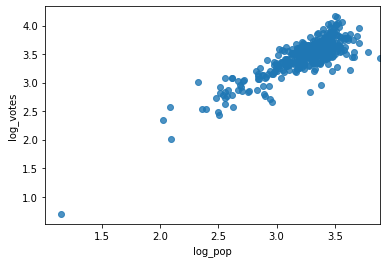

In [10]:
# Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map
sns.regplot(de_elecmap['log_pop'], de_elecmap['log_votes'])
plt.show()

In [11]:
print(de_elecmap["votes"].min())
print(de_elecmap["POPULATION"].min())
print(de_elecmap["log_votes"].min())
print(de_elecmap["log_pop"].min())

0
0
-inf
-inf


In [12]:
de_elecmap["log_votes"] = de_elecmap["log_votes"].clip(0,10)
de_elecmap["log_pop"] = de_elecmap["log_pop"].clip(0,10)

In [13]:
print(de_elecmap["votes"].min())
print(de_elecmap["POPULATION"].min())
print(de_elecmap["log_votes"].min())
print(de_elecmap["log_pop"].min())

0
0
0.0
0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


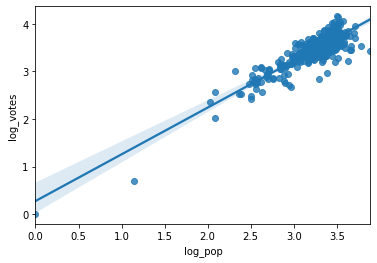

In [14]:
sns.regplot(de_elecmap['log_pop'], de_elecmap['log_votes'])
plt.show()

# make 3 maps: a coropleth of the population by electoral precinct, votes by precinct, and people density. 
Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map.... what is wrong with it? why does it not look like your usual maps of Delaware? how does this affect the descriptive analysis you just did? Make sure you choose appropriate colors maps and scheme to display the colors. Note that the last map may not be trivial to render. log10 function may be halpful (see notebook https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb but it is not required to use it) and also consider the individual values in the rows - are any of them unuaual? if there are consider dropping those values.

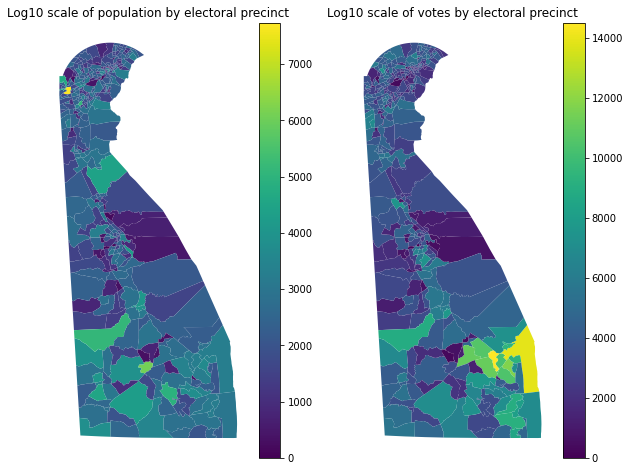

In [15]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(121)
de_elecmap.plot(column="POPULATION", ax=ax, legend=True)
plt.title("Log10 scale of population by electoral precinct")
ax.axis('off');

ax = fig.add_subplot(122)
de_elecmap.plot(column="votes", ax=ax, legend=True)
plt.title("Log10 scale of votes by electoral precinct")
ax.axis('off');

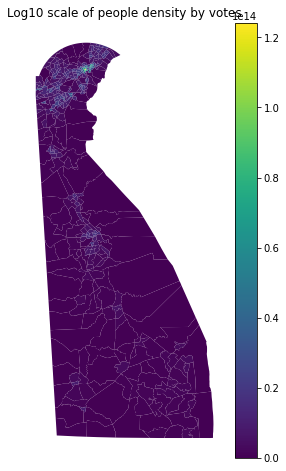

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(121)
de_elecmap.plot(column="popdensity", ax=ax, legend=True)
plt.title("Log10 scale of people density by votes")
ax.axis('off');

# look at the variables' correlation

In [17]:
import scipy as sp

In [18]:
cols=["OBJECTID", "ID", "POPULATION", "votes", "popdensity"]
de_elecmap_sub = de_elecmap[cols]

In [19]:
de_elecmap_sub.corr()

,OBJECTID,ID,POPULATION,votes,popdensity
OBJECTID,1.000000,0.991589,0.037839,0.178269,-0.353672
ID,0.991589,1.000000,0.036542,0.178375,-0.353397
POPULATION,0.037839,0.036542,1.000000,0.624456,-0.032127
votes,0.178269,0.178375,0.624456,1.000000,-0.222520
popdensity,-0.353672,-0.353397,-0.032127,-0.222520,1.000000


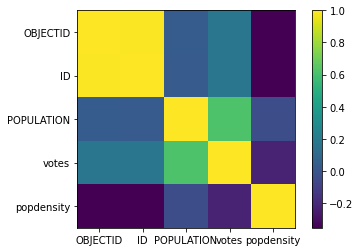

In [20]:
#Correlation matrix - we will discuss this kind of plot soon
plt.imshow(de_elecmap_sub.corr())
plt.xticks(range(len(de_elecmap_sub.corr())), de_elecmap_sub.corr().columns)
plt.yticks(range(len(de_elecmap_sub.corr())), de_elecmap_sub.corr().columns)
plt.colorbar();

# fit a line model to the data and a polynomial of second degree. 
You can use whatever package you want but if you use statsmodels you can get 
model diagnostics that will help you discuss the model

plot the model over the data

https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb


# extra credit: set up the problem as a machine leraning problem by splitting the sample into training and test data and evaluating the model on both sets.

This is in the notebook I shared, even if we did not get to talk about it in class https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

In [21]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
mod1 = smf.ols(formula='votes ~ POPULATION', data=de_elecmap)
model1 = mod1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     272.9
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           9.24e-48
Time:                        23:40:52   Log-Likelihood:                -3778.5
No. Observations:                 429   AIC:                             7561.
Df Residuals:                     427   BIC:                             7569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    897.8943    182.592      4.917      0.000     539.003    1256.786
POPULATION     1.3020      0.079     16.521      0.000       1.147       1.457
==============================================================================
Omnibus:                      144.314   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.455
Skew:                           1.206   Prob(JB):                    3.77e-253
Kurtosis:                      10.695   Cond. No.                     5.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
mod2 = smf.ols(formula='votes ~ I(POPULATION**2) + POPULATION', data=de_elecmap)
model2 = mod2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     190.1
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           9.99e-60
Time:                        23:40:52   Log-Likelihood:                -3747.7
No. Observations:                 429   AIC:                             7501.
Df Residuals:                     426   BIC:                             7514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -503.6456    242.502     -2.077      0.038    -980.294     -26.997
I(POPULATION ** 2)    -0.0003   3.64e-05     -8.111      0.000      -0.000      -0.000
POPULATION             2.7284      0.191     14.317      0.000       2.354       3.103
==============================================================================
Omnibus:                      194.221   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1305.105
Skew:                           1.820   Prob(JB):                    3.98e-284
Kurtosis:                      10.731   Cond. No.                     2.49e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

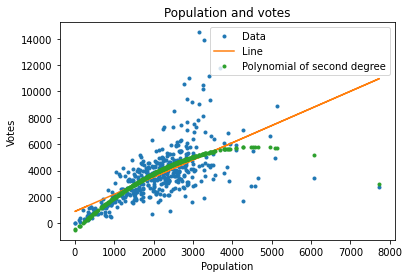

In [24]:
plt.plot(de_elecmap['POPULATION'], de_elecmap['votes'], '.')
plt.plot(de_elecmap.POPULATION, model1.predict(de_elecmap))
plt.plot(de_elecmap.POPULATION, model2.predict(de_elecmap), '.')
plt.title('Population and votes')
plt.legend(['Data', 'Line', 'Polynomial of second degree'])
plt.xlabel('Population')
plt.ylabel('Votes');

# Make an influence plot for each of the 2 models following the notebook in class. 
https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

Interpret it based on the slides and the notebook info
---



In [25]:
model1.params

Intercept     897.894306
POPULATION      1.302048
dtype: float64

In [26]:
model1.conf_int()

,0,1
Intercept,539.002960,1256.785652
POPULATION,1.147139,1.456957


In [27]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(model1, alpha=0.05)
data.shape

(429, 12)

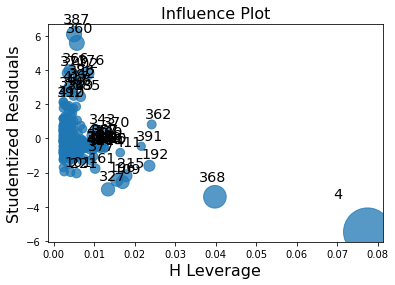

In [28]:
sm.graphics.influence_plot(model1);

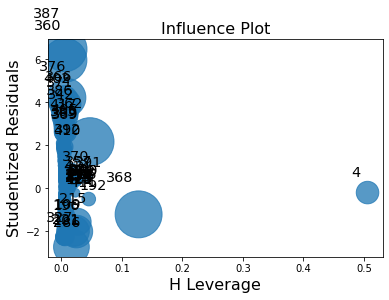

In [29]:
sm.graphics.influence_plot(model2);

# Compare the models with the Likelihood Ration test (follow example in class)


In [30]:
model2.compare_lr_test(model1)

(61.606214669798646, 4.194925183501481e-15, 1.0)

In [31]:
print('likelihood ration test - set alpha to alpha=0.05\n\n' ,  
      'the NH is that the more complex model is better than the simpler one\n\n' ,
'''the likelihood ration statistics is {0:.2f}, which corresponds to a p-value of {1:.2f}\n
since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (={2:.0f} here)
this corresponds not being able to reject the NH at alpha 0.05'''.format(*model2.compare_lr_test(model1)))

likelihood ration test - set alpha to alpha=0.05

 the NH is that the more complex model is better than the simpler one

 the likelihood ration statistics is 61.61, which corresponds to a p-value of 0.00

since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (=1 here)
this corresponds not being able to reject the NH at alpha 0.05



# Discuss your model: what it means mathematically and what it means in practice

You must discuss the model on the basis of the model summary (R squared, adjusted R squared, p-values for the coefficients etc)

You must discuss the influence plot on the basis of the lecture discussion and of the reading

You must assess wheather the more complex model is better

## **Model summary:** 


R squared is to find how the model is good. The equation of the R square refers to 1 minus sum of the SSE divided by the sum of variance. If the variance is high, R squared is high. If the variance is low, R squared is low. Increasing the model complexity increases the R2 but does not guarantee a better model

**R squared**

R squared of the model 1 is 0.39

R squared of the model 2 is 0.472


**Adjusted R squared** 

Adjusted R2 takes into account how many datapoints I have and how many parameters I have

Adjusted R squared of the model 1 is 0.389

Adjusted R squared of the model 2 is 0.469


**P-values for the coeffients**

P-value measures statistical significance of the correlation between the variables. 

P > ItI of the model 1 is 0

P > ItI of the model 2 is around 0 and 0.038 (0.038 for X[0] and 0 for X[1])

The R squared of this model is 0.39. The adjusted R2 is similar to R2, which means the datapoints and parameters have little effect. The p-value is around 0, which means the correlation between population and votes is significant. 



## **Influence Plot:** 

This function creates a "bubble" plot of studentized residuals versus hat leverage values. The influence plot helps to identify data points that might have strong influence over the model fit. Unusual data points can be unusal because they have an unusual X values (at the edge of the distribution), or because their y value is an "outlier". Points that are both are on the top right of the plot and are high influence points. The influence of the point measured as Cook's distance is represented by the size of the bubble. 

In this model, R2 and adjusted R2 are low, therefore the influence plot shows high studentized residuals and low H leverage. 

## **Assess the model**

As a result, this model is poor model as result of the cross validation shows the low in-sample scores. Therefore, I can conlude that the more compex model is better. The R suqred of the model 1 and the model 2 is 0.39 and 0.472 respectively, which are regarded as low value. It means the model is not good enough. Increasing the model complexity increases the R2 but does not guarantee a better model.  

# Extra Credit: Collect any other variable about Delaware that you think may be relevant to predit turn out and fit a line model using that as an exogenous variable.

You have a few options here: 
- dig for some other variable that is available at the electoral precinct level 
- get a variable at the county level , which means that the endogenous variable (votes) will be far more granular than the exogenous one... how would you deal with it?
- get a variable at a hith resolution geomeetry, such as census block or census tract, and merge the geometry. This is the hardest option. The Census bureau offers advise on conversion between geometries

Discuss your model: what it means mathematically and what it means in practice
